# Basic Data Processing with Pandas

## The DataFrame Data Structure
For the purchase records from the pet store, how would you get a list of all items which had been purchased (regardless of where they might have been purchased, or by whom)?

In [2]:
import pandas as pd

In [3]:
purchase_1 = pd.Series({'Name': 'Chris', 'Item Purchased': 'Dog Food', 'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod', 'Item Purchased': 'Bird Seed', 'Cost': 5.00})

df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])

# Your code here
df['Item Purchased']


Store 1        Dog Food
Store 1    Kitty Litter
Store 2       Bird Seed
Name: Item Purchased, dtype: object

For the purchase records from the pet store, how would you update the DataFrame, applying a discount of 20% across all the values in the 'Cost' column?

In [4]:
df['Cost'] *= 0.8
df

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,18.0
Store 1,Kevyn,Kitty Litter,2.0
Store 2,Vinod,Bird Seed,4.0


In [5]:
!cat olympics.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


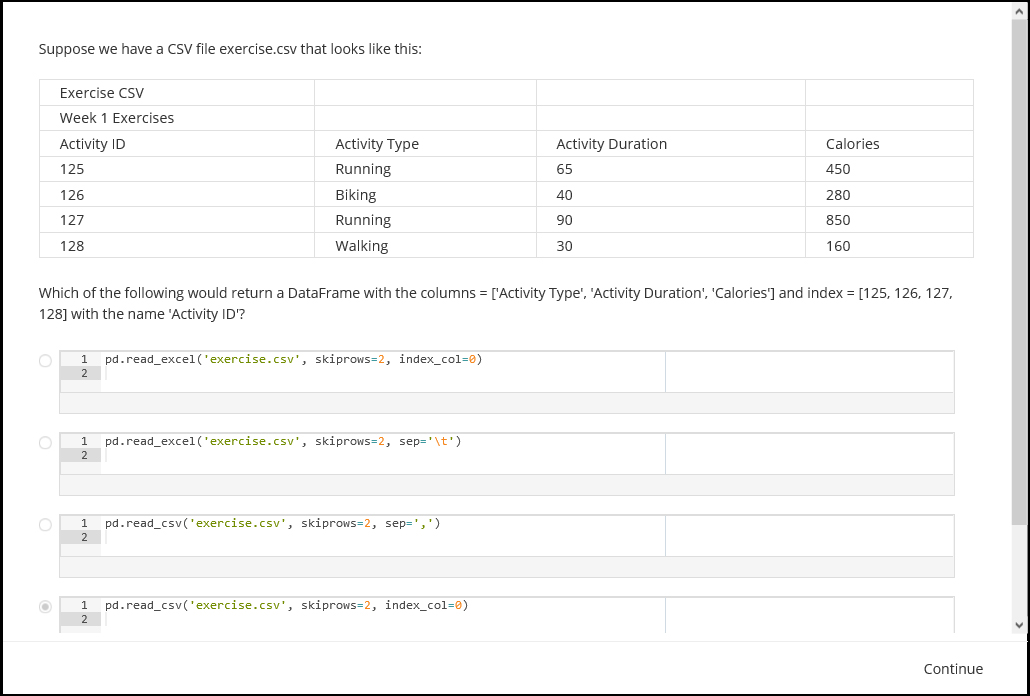

In [6]:
df_ex = pd.read_csv('Exercise.csv', skiprows=2, index_col=0)
df_ex

,Activity Type,Activity Duration,Calories
Activity ID,,,
125,Running,65,450
126,Biking,40,280
127,Running,90,850
128,Walking,30,160


## Querying DataFrame

Write a query to return all of the names of people who bought products worth more than $3.00.

In [7]:
df.where(df['Cost'] > 3.0)

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,18.0
Store 1,NaN,NaN,NaN
Store 2,Vinod,Bird Seed,4.0


In [8]:

#only purchases of more than $3

df[df['Cost'] > 3.0]

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,18.0
Store 2,Vinod,Bird Seed,4.0


In [9]:
df['Name'][df['Cost'] > 3.0]

Store 1    Chris
Store 2    Vinod
Name: Name, dtype: object

## Indexing Dataframes
Reindex the purchase records DataFrame to be indexed hierarchically, first by store, then by person. Name these indexes 'Location' and 'Name'. Then add a new entry to it with the value of:

Name: 'Kevyn', Item Purchased: 'Kitty Food', Cost: 3.00 Location: 'Store 2'.

In [10]:
#my code
df['Location'] = df.index
df = df.set_index(['Location', 'Name'])

In [11]:
df = df.append(pd.Series(data={'Item Purchased': 'Kitty Food', 'Cost': 3.00}, name=('Store 2', 'Kevyn')))
df

Item Purchased  Cost
Location Name                      
Store 1  Chris       Dog Food  18.0
         Kevyn   Kitty Litter   2.0
Store 2  Vinod      Bird Seed   4.0
         Kevyn     Kitty Food   3.0